# Melodic Arch

In [1]:
import numpy as np
import pandas as pd
from scipy.fftpack import dct, idct

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec
from music21 import converter
matplotlib.style.use('styles.mplstyle')

import sys
sys.path.append('../')
from helpers import cm2inch, title

In [2]:
def load_contours(fn, num_samples=100):
    df = pd.read_csv(fn)
    contours = df[[str(i) for i in range(num_samples)]].values
    return contours, df

# contours, df = load_contours('../data/contours/phrase/boehme-phrase-contours.csv')

In [3]:
erk_phrase, _ = load_contours('../data/phrase-contours/erk-phrase-contours.csv')
erk_rand, _ = load_contours('../data/phrase-contours/erk-random-contours.csv')

In [4]:
han_phrase, _ = load_contours('../data/phrase-contours/han-phrase-contours.csv')
han_rand, _ = load_contours('../data/phrase-contours/han-random-contours.csv')

In [5]:
C_han_phrase = dct(han_phrase, norm='ortho')
C_han_rand = dct(han_rand, norm='ortho')
C_erk_phrase = dct(erk_phrase, norm='ortho')
C_erk_rand = dct(erk_rand, norm='ortho')

In [6]:
df = pd.DataFrame(
      [(c1, 'Chinese', 'phrase', 'c1') for c1 in C_han_phrase[:, 1]]
    + [(-1*c2, 'Chinese', 'phrase', 'c2') for c2 in C_han_phrase[:, 2]]
    + [(c1, 'Chinese', 'random', 'c1') for c1 in C_han_rand[:, 1]]
    + [(-1*c2, 'Chinese', 'random', 'c2') for c2 in C_han_rand[:, 2]]
    + [(c1, 'German', 'phrase', 'c1') for c1 in C_erk_phrase[:, 1]]
    + [(-1*c2, 'German', 'phrase', 'c2') for c2 in C_erk_phrase[:, 2]]
    + [(c1, 'German', 'random', 'c1') for c1 in C_erk_rand[:, 1]]
    + [(-1*c2, 'German', 'random', 'c2') for c2 in C_erk_rand[:, 2]],
    columns = ['value', 'dataset', 'kind', 'coefficient']
)

## Violin plots

In [7]:
def show_descendingness(df, ylim=(-50, 50)):
    sns.violinplot(data=df[df['coefficient'] == 'c1'], 
               x='dataset', hue='kind', y='value', 
               order=['German', 'Chinese'],
               split=True, inner='quart', linewidth=.75, legend=None)
    plt.ylabel('coefficient $c_1$')
    plt.ylim(*ylim)
    plt.xlabel(None)

In [8]:
def show_archedness(df, ylim=(-50, 50)):
    sns.violinplot(data=df[df['coefficient'] == 'c2'], 
               x='dataset', hue='kind', y='value', 
               order=['German', 'Chinese'],
               split=True, inner='quart', linewidth=.75, cut=0)
    plt.ylabel('coefficient  $-c_2$')
    plt.ylim(*ylim)
    plt.xlabel(None)

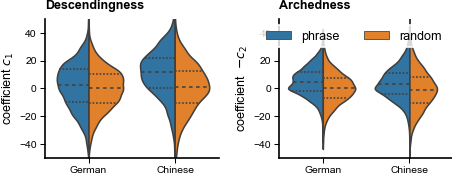

In [9]:
plt.figure(figsize=cm2inch(8.2, 3.5), tight_layout=True)

ax = plt.subplot(121)
show_descendingness(df)
title('Descendingness')
ax.get_legend().remove()

plt.subplot(122)
show_archedness(df)
title('Archedness')
plt.legend(ncol=2)

# plt.savefig('../figures/fig-melodic-arch.pdf')

## Average contour

In [10]:
def plot_average_contour(contours, baseline, f=.25, color='C3'):
    contours = contours - contours.mean(axis=1)[:, np.newaxis]
    baseline = baseline - baseline.mean(axis=1)[:, np.newaxis]
    
    xs = np.linspace(0, 1, contours.shape[1])
    b_mean = baseline.mean(axis=0)
    b_std = (f/2) * baseline.std(axis=0)
    plt.plot(xs, b_mean, 'k', lw=1, zorder=-1, alpha=.5, label='baseline')
    plt.fill_between(xs, b_mean-b_std, b_mean+b_std, alpha=.1, color='k',lw=0)
    
    mean = contours.mean(axis=0)
    std = f/2 * contours.std(axis=0)
    plt.plot(xs, mean, color, lw=1, label=f'phrases')
    plt.fill_between(xs, mean-std, mean+std, alpha=.2, color=color, label=f'${f:.2f}\sigma$', lw=0)
    plt.plot([0, 1], [0, 0], 'k:', lw=.5, alpha=.5)

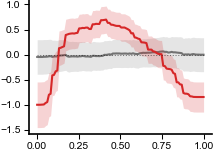

In [11]:
plt.figure(figsize=cm2inch(4,3))
plot_average_contour(erk_phrase, erk_rand)

## Combined plot

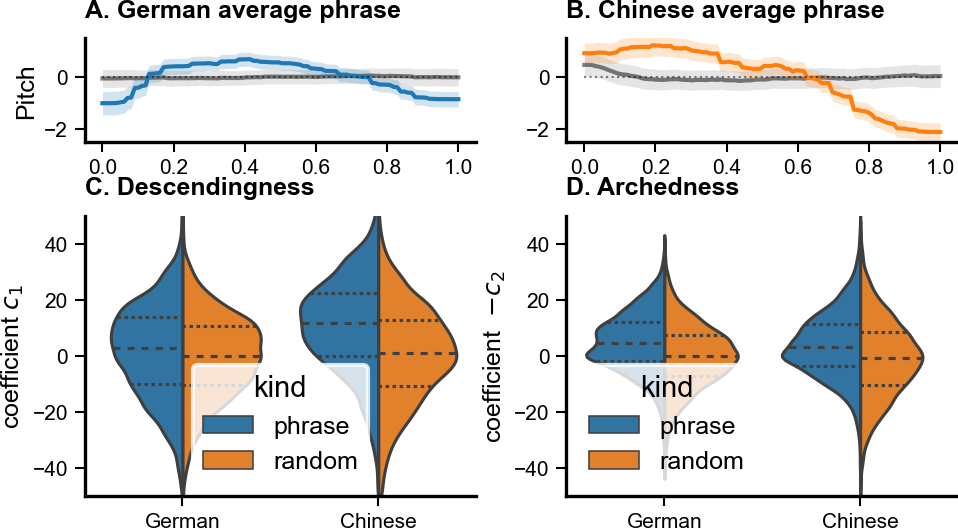

In [12]:
fig = plt.figure(figsize=cm2inch(8.2, 4.5))

gs = gridspec.GridSpec(3, 2)

fig.add_subplot(gs[0, 0])
plot_average_contour(erk_phrase, erk_rand, color='C0')
title('A. German average phrase')
plt.ylabel('Pitch')
plt.ylim(-2.5, 1.5)

fig.add_subplot(gs[0, 1])
plot_average_contour(han_phrase, han_rand, color='C1')
title('B. Chinese average phrase')
plt.ylim(-2.5, 1.5)

fig.add_subplot(gs[1:, 0])
show_descendingness(df)
title('C. Descendingness')

fig.add_subplot(gs[1:, 1])
show_archedness(df)
title('D. Archedness')

plt.tight_layout(pad=0)
plt.savefig('../figures/fig05/fig05-raw.pdf')

## Test differences in means

In [13]:
c1_de_phrase = df.query('coefficient=="c1" and dataset=="German" and kind=="phrase"')
c1_de_rand = df.query('coefficient=="c1" and dataset=="German" and kind=="random"')
c1_zh_phrase = df.query('coefficient=="c1" and dataset=="Chinese" and kind=="phrase"')
c1_zh_rand = df.query('coefficient=="c1" and dataset=="Chinese" and kind=="random"')

c2_de_phrase = df.query('coefficient=="c2" and dataset=="German" and kind=="phrase"')
c2_de_rand = df.query('coefficient=="c2" and dataset=="German" and kind=="random"')
c2_zh_phrase = df.query('coefficient=="c2" and dataset=="Chinese" and kind=="phrase"')
c2_zh_rand = df.query('coefficient=="c2" and dataset=="Chinese" and kind=="random"')

In [14]:
import scipy.stats

In [15]:
# German descendingness
scipy.stats.ttest_ind(c1_de_phrase['value'], c1_de_rand['value'])

Ttest_indResult(statistic=7.739914785397301, pvalue=1.0492018370919035e-14)

In [16]:
# German archedness
scipy.stats.ttest_ind(c2_de_phrase['value'], c2_de_rand['value'])

Ttest_indResult(statistic=29.168076550928753, pvalue=1.2084548780459065e-182)

In [17]:
# Chinese descendingness
scipy.stats.ttest_ind(c1_zh_phrase['value'], c1_zh_rand['value'])

Ttest_indResult(statistic=34.04683821787533, pvalue=1.8684773831584586e-243)

In [18]:
# Chinese archedness
scipy.stats.ttest_ind(c2_zh_phrase['value'], c2_zh_rand['value'])

Ttest_indResult(statistic=21.19988809124454, pvalue=4.341265507255374e-98)